In [8]:
pip install "dandi>=0.60.0"


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.5/339.5 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 24.0 MB/s eta 0:00:00
   ━━━━

In [9]:
from dandi import dandiapi
from dandi import download
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import os
import matplotlib as mpl

%matplotlib inline

In [10]:
dandiset_id = "001637"
dandi_filepath = "sub-820459/sub-820459_ses-ecephys-820459-2025-11-12-14-34-33_ecephys.nwb"
download_loc = "."

client = dandiapi.DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id)
file = dandiset.get_asset_by_path(dandi_filepath)
file_url = file.download_url
filename = dandi_filepath.split("/")[-1]
filepath = f"{download_loc}/{filename}"
if os.path.exists(filepath):
    print("File already exists")
else:
    # This can sometimes take a while depending on the size of the file
    download.download(file_url, output_dir=download_loc)
    print(f"Downloaded file to {filepath}")

PATH                                                          SIZE    DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-820459_ses-ecephys-820459-2025-11-12-14-34-33_ecephys.nwb 11.5 GB 11.5 GB          100%    ok    done                   
Summary:                                                      11.5 GB 11.5 GB                        1 done                 
                                                                      100.00%                                               
Downloaded file to ./sub-820459_ses-ecephys-820459-2025-11-12-14-34-33_ecephys.nwb


In [11]:
# the download code above will set filepath according to your download location
# filepath = r"/root/capsule/data/ecephys_820459_2025-11-12_14-34-33_nwb_2025-11-23_02-55-05/ecephys_820459_2025-11-12_14-34-33_experiment1_recording1.nwb"

io = NWBHDF5IO(filepath, mode="r", load_namespaces=True)
nwb = io.read()

/usr/local/lib/python3.12/dist-packages/hdmf/common/table.py:512: UserWarning: An attribute 'name' already exists on TimeIntervals '40 hz pulse train_presentations' so this column cannot be accessed as an attribute, e.g., table.name; it can only be accessed using other methods, e.g., table['name'].
  self.__set_table_attr(col)
/usr/local/lib/python3.12/dist-packages/hdmf/common/table.py:512: UserWarning: An attribute 'name' already exists on TimeIntervals '5 hz pulse train_presentations' so this column cannot be accessed as an attribute, e.g., table.name; it can only be accessed using other methods, e.g., table['name'].
  self.__set_table_attr(col)
/usr/local/lib/python3.12/dist-packages/hdmf/common/table.py:512: UserWarning: An attribute 'name' already exists on TimeIntervals 'raised_cosine_presentations' so this column cannot be accessed as an attribute, e.g., table.name; it can only be accessed using other methods, e.g., table['name'].
  self.__set_table_attr(col)


In [12]:
nwb

Data type,float32
Shape,"(265441,)"
Array size,1.01 MiB
Chunk shape,None
Compression,None
Compression opts,None
Uncompressed size (bytes),1061764
Compressed size (bytes),1061764
Compression ratio,1.0
Data type,float64
Shape,"(265441,)"


In [13]:
nwb.subject

subject pynwb.file.Subject at 0x134581786875696
Fields:
  age: P108D
  age__reference: birth
  date_of_birth: 2025-07-27 00:00:00-07:53
  genotype: Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
  sex: F
  species: Mus musculus
  subject_id: 820459

In [14]:
for k in nwb.intervals.keys(): print(k)

40 hz pulse train_presentations
5 hz pulse train_presentations
Control block 1_presentations
Control block 2_presentations
Control block 3_presentations
Control block 4_presentations
RF mapping_presentations
Sequence mismatch block_presentations
Trippy_presentations
Zebra_presentations
raised_cosine_presentations
spontaneous_presentations


In [15]:
stim_table = nwb.intervals["Sequence mismatch block_presentations"]
print(stim_table.colnames)
stim_table
# use this to get a pandas dataframe
# stim_table_df = stim_table.to_dataframe()

('start_time', 'stop_time', 'stim_name', 'stim_type', 'stim_block', 'Orientation', 'SpatialFrequency', 'TemporalFrequency', 'contrast', 'phase', 'DiameterX', 'DiameterY', 'X', 'Y', 'Duration', 'Delay', 'BlockNumber', 'BlockLabel', 'TrialNumber', 'SequenceNumber', 'TrialInSequence', 'TrialType', 'BlockType', 'stim_index', 'timeseries')


,start_time,stop_time,stim_name,stim_type,stim_block,Orientation,SpatialFrequency,TemporalFrequency,contrast,phase,DiameterX,DiameterY,X,Y,Duration,Delay,BlockNumber,BlockLabel,TrialNumber,SequenceNumber,TrialInSequence,TrialType,BlockType,stim_index,timeseries
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,435.529126,435.796017,Sequence mismatch block,None or Blank,1.0,1.5707963267948966,0.04,2.0,1.0,0.0,360.0,360.0,0.0,0.0,0.25,0.0,2.0,Sequence mismatch block,545.0,1.0,1.0,standard,sequential_oddball,1.0,"[(544, 1, timestamps pynwb.base.TimeSeries at 0x134581774284944\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (39555,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (39555,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"
1,435.796017,436.062908,Sequence mismatch block,None or Blank,1.0,0.7853981633974483,0.04,2.0,1.0,0.0,360.0,360.0,0.0,0.0,0.25,0.0,2.0,Sequence mismatch block,546.0,1.0,2.0,standard,sequential_oddball,1.0,"[(545, 1, timestamps pynwb.base.TimeSeries at 0x134581774284944\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (39555,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (39555,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"
2,436.062908,436.329799,Sequence mismatch block,None or Blank,1.0,0.0,0.04,2.0,1.0,0.0,360.0,360.0,0.0,0.0,0.25,0.0,2.0,Sequence mismatch block,547.0,1.0,3.0,standard,sequential_oddball,1.0,"[(546, 1, timestamps pynwb.base.TimeSeries at 0x134581774284944\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (39555,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (39555,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"
3,436.329799,436.596691,Sequence mismatch block,None or Blank,1.0,0.7853981633974483,0.04,2.0,1.0,0.0,360.0,360.0,0.0,0.0,0.25,0.0,2.0,Sequence mismatch block,548.0,1.0,4.0,standard,sequential_oddball,1.0,"[(547, 1, timestamps pynwb.base.TimeSeries at 0x134581774284944\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (39555,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (39555,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"


In [16]:
np.unique(stim_table["TrialType"])

array(['halt', 'omission', 'orientation_45', 'orientation_90',
       'sequence_omission', 'standard'], dtype='<U17')

In [17]:
lfp = nwb.processing['ecephys']['LFP'].electrical_series
for k in lfp.keys(): print(k)

ElectricalSeriesProbeA-LFP
ElectricalSeriesProbeB-LFP
ElectricalSeriesProbeC-LFP
ElectricalSeriesProbeD-LFP
ElectricalSeriesProbeF-LFP


(6767034,)
(6767034, 96)


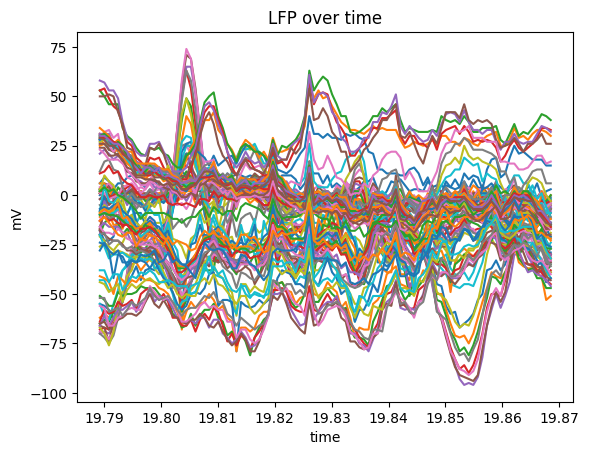

In [18]:
# conversion to np.array required for plotting
probeC_lfp_times = np.array(lfp["ElectricalSeriesProbeC-LFP"].timestamps)
probeC_lfp_traces = np.array(lfp["ElectricalSeriesProbeC-LFP"].data)

print(probeC_lfp_times.shape)
print(probeC_lfp_traces.shape)


plt.plot(probeC_lfp_times[:100], probeC_lfp_traces[:100])
plt.xlabel("time")
plt.ylabel("mV")
plt.title("LFP over time")
plt.show()

In [19]:
units_table = nwb.units
print(units_table.colnames)
units_table
# use this to get a pandas dataframe (it may take a lot of time and memory)
# units_table_df = units_table.to_dataframe()

('spike_times', 'electrodes', 'waveform_mean', 'waveform_sd', 'unit_name', 'nn_hit_rate', 'presence_ratio', 'recovery_slope', 'amplitude_cutoff', 'decoder_label', 'num_negative_peaks', 'depth', 'peak_to_valley', 'decoder_probability', 'extremum_channel_index', 'rp_violations', 'estimated_y', 'isi_violations_ratio', 'isolation_distance', 'original_cluster_id', 'l_ratio', 'estimated_x', 'velocity_below', 'amplitude_median', 'estimated_z', 'amplitude_cv_median', 'rp_contamination', 'ks_unit_id', 'snr', 'exp_decay', 'spread', 'shank', 'firing_range', 'drift_std', 'amplitude', 'half_width', 'amplitude_cv_range', 'num_positive_peaks', 'peak_trough_ratio', 'silhouette', 'isi_violations_count', 'sync_spike_8', 'firing_rate', 'd_prime', 'repolarization_slope', 'drift_mad', 'sync_spike_2', 'drift_ptp', 'nn_miss_rate', 'velocity_above', 'sliding_rp_violation', 'sync_spike_4', 'device_name', 'num_spikes', 'default_qc')


units pynwb.misc.Units at 0x134581772822016
Fields:
  colnames: ['spike_times' 'electrodes' 'waveform_mean' 'waveform_sd' 'unit_name'
 'nn_hit_rate' 'presence_ratio' 'recovery_slope' 'amplitude_cutoff'
 'decoder_label' 'num_negative_peaks' 'depth' 'peak_to_valley'
 'decoder_probability' 'extremum_channel_index' 'rp_violations'
 'estimated_y' 'isi_violations_ratio' 'isolation_distance'
 'original_cluster_id' 'l_ratio' 'estimated_x' 'velocity_below'
 'amplitude_median' 'estimated_z' 'amplitude_cv_median' 'rp_contamination'
 'ks_unit_id' 'snr' 'exp_decay' 'spread' 'shank' 'firing_range'
 'drift_std' 'amplitude' 'half_width' 'amplitude_cv_range'
 'num_positive_peaks' 'peak_trough_ratio' 'silhouette'
 'isi_violations_count' 'sync_spike_8' 'firing_rate' 'd_prime'
 'repolarization_slope' 'drift_mad' 'sync_spike_2' 'drift_ptp'
 'nn_miss_rate' 'velocity_above' 'sliding_rp_violation' 'sync_spike_4'
 'device_name' 'num_spikes' 'default_qc']
  columns: (
    spike_times_index <class 'hdmf.common.table.VectorIndex'>,
    spike_times <class 'hdmf.common.table.VectorData'>,
    electrodes_index <class 'hdmf.common.table.VectorIndex'>,
    electrodes <class 'hdmf.common.table.DynamicTableRegion'>,
    waveform_mean <class 'hdmf.common.table.VectorData'>,
    waveform_sd <class 'hdmf.common.table.VectorData'>,
    unit_name <class 'hdmf.common.table.VectorData'>,
    nn_hit_rate <class 'hdmf.common.table.VectorData'>,
    presence_ratio <class 'hdmf.common.table.VectorData'>,
    recovery_slope <class 'hdmf.common.table.VectorData'>,
    amplitude_cutoff <class 'hdmf.common.table.VectorData'>,
    decoder_label <class 'hdmf.common.table.VectorData'>,
    num_negative_peaks <class 'hdmf.common.table.VectorData'>,
    depth <class 'hdmf.common.table.VectorData'>,
    peak_to_valley <class 'hdmf.common.table.VectorData'>,
    decoder_probability <class 'hdmf.common.table.VectorData'>,
    extremum_channel_index <class 'hdmf.common.table.VectorData'>,
    rp_violations <class 'hdmf.common.table.VectorData'>,
    estimated_y <class 'hdmf.common.table.VectorData'>,
    isi_violations_ratio <class 'hdmf.common.table.VectorData'>,
    isolation_distance <class 'hdmf.common.table.VectorData'>,
    original_cluster_id <class 'hdmf.common.table.VectorData'>,
    l_ratio <class 'hdmf.common.table.VectorData'>,
    estimated_x <class 'hdmf.common.table.VectorData'>,
    velocity_below <class 'hdmf.common.table.VectorData'>,
    amplitude_median <class 'hdmf.common.table.VectorData'>,
    estimated_z <class 'hdmf.common.table.VectorData'>,
    amplitude_cv_median <class 'hdmf.common.table.VectorData'>,
    rp_contamination <class 'hdmf.common.table.VectorData'>,
    ks_unit_id <class 'hdmf.common.table.VectorData'>,
    snr <class 'hdmf.common.table.VectorData'>,
    exp_decay <class 'hdmf.common.table.VectorData'>,
    spread <class 'hdmf.common.table.VectorData'>,
    shank <class 'hdmf.common.table.VectorData'>,
    firing_range <class 'hdmf.common.table.VectorData'>,
    drift_std <class 'hdmf.common.table.VectorData'>,
    amplitude <class 'hdmf.common.table.VectorData'>,
    half_width <class 'hdmf.common.table.VectorData'>,
    amplitude_cv_range <class 'hdmf.common.table.VectorData'>,
    num_positive_peaks <class 'hdmf.common.table.VectorData'>,
    peak_trough_ratio <class 'hdmf.common.table.VectorData'>,
    silhouette <class 'hdmf.common.table.VectorData'>,
    isi_violations_count <class 'hdmf.common.table.VectorData'>,
    sync_spike_8 <class 'hdmf.common.table.VectorData'>,
    firing_rate <class 'hdmf.common.table.VectorData'>,
    d_prime <class 'hdmf.common.table.VectorData'>,
    repolarization_slope <class 'hdmf.common.table.VectorData'>,
    drift_mad <class 'hdmf.common.table.VectorData'>,
    sync_spike_2 <class 'hdmf.common.table.VectorData'>,
    drift_ptp <class 'hdmf.common.table.VectorData'>,
    nn_miss_rate <class 'hdmf.common.table.VectorData'>,
    velocity_above <class 'hdmf.common.table.VectorData'>,
    sliding_rp_violatio

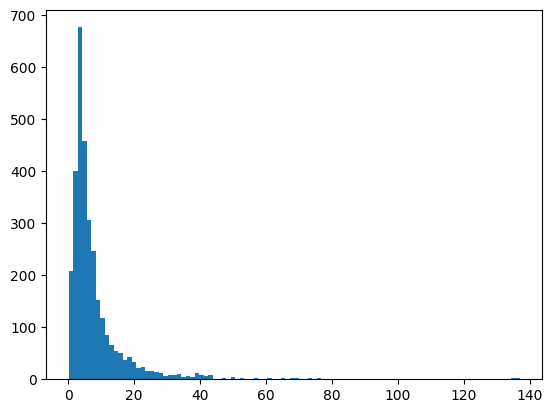

In [20]:
plt.hist(np.array(units_table["snr"]), bins=100)
plt.show()

In [21]:
# when indexing a pynwb table, make sure to access the row idx *after* accessing the column, as below
selected_units = [i for i in range(len(units_table)) if units_table["snr"][i] > 10]
selected_units

[3,
 20,
 26,
 42,
 61,
 70,
 91,
 96,
 108,
 122,
 123,
 125,
 152,
 228,
 252,
 253,
 261,
 273,
 299,
 303,
 304,
 328,
 330,
 332,
 336,
 358,
 379,
 386,
 389,
 396,
 402,
 404,
 412,
 414,
 415,
 425,
 439,
 442,
 445,
 448,
 449,
 452,
 453,
 458,
 463,
 469,
 473,
 476,
 478,
 481,
 482,
 492,
 496,
 499,
 504,
 505,
 509,
 510,
 511,
 512,
 513,
 514,
 519,
 520,
 521,
 522,
 529,
 533,
 535,
 541,
 548,
 553,
 555,
 560,
 577,
 579,
 583,
 585,
 586,
 587,
 597,
 604,
 605,
 606,
 607,
 611,
 613,
 618,
 620,
 622,
 624,
 626,
 629,
 635,
 636,
 639,
 642,
 645,
 648,
 654,
 674,
 676,
 677,
 685,
 686,
 687,
 692,
 693,
 696,
 698,
 699,
 700,
 701,
 702,
 706,
 722,
 733,
 734,
 741,
 763,
 764,
 765,
 767,
 775,
 776,
 777,
 780,
 781,
 785,
 788,
 795,
 799,
 802,
 805,
 806,
 812,
 814,
 815,
 816,
 818,
 822,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 832,
 839,
 840,
 841,
 842,
 843,
 849,
 851,
 852,
 853,
 854,
 858,
 874,
 889,
 895,
 897,
 906,
 909,
 916,
 918,
 

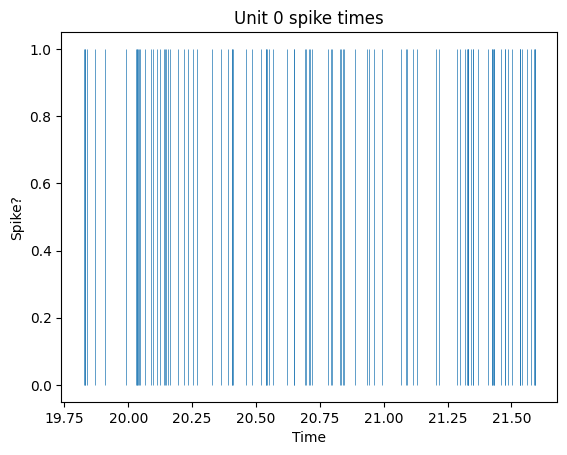

In [22]:
# conversion to np.array required for plotting
unit0_spikes = np.array(nwb.units["spike_times"][0])
plt.vlines(unit0_spikes[:100], 0, 1, lw=0.5)
plt.title("Unit 0 spike times")
plt.xlabel("Time")
plt.ylabel("Spike?")
plt.show()

#Electrodes and Unit Brain Location


In [23]:
electrodes = nwb.electrodes
electrodes
# use this to get pandas dataframe
# electrodes_df = electrodes.to_dataframe()
print(electrodes.colnames)
electrodes

('location', 'group', 'group_name', 'channel_name', 'gain_to_physical_unit', 'rel_y', 'physical_unit', 'offset_to_physical_unit', 'rel_x', 'inter_sample_shift')


,location,group,group_name,channel_name,gain_to_physical_unit,rel_y,physical_unit,offset_to_physical_unit,rel_x,inter_sample_shift
id,,,,,,,,,,
0,unknown,ProbeA pynwb.ecephys.ElectrodeGroup at 0x134581776615520\nFields:\n description: Recorded electrodes from probe ProbeA\n device: ProbeA pynwb.device.Device at 0x134581776619312\nFields:\n description: Model: - Serial number: 22175714801\n manufacturer: IMEC\n\n location: unknown\n,ProbeA,AP0,0.195,0.0,uV,0.0,16.0,0.000000
1,unknown,ProbeA pynwb.ecephys.ElectrodeGroup at 0x134581776615520\nFields:\n description: Recorded electrodes from probe ProbeA\n device: ProbeA pynwb.device.Device at 0x134581776619312\nFields:\n description: Model: - Serial number: 22175714801\n manufacturer: IMEC\n\n location: unknown\n,ProbeA,AP1,0.195,0.0,uV,0.0,48.0,0.000000
2,unknown,ProbeA pynwb.ecephys.ElectrodeGroup at 0x134581776615520\nFields:\n description: Recorded electrodes from probe ProbeA\n device: ProbeA pynwb.device.Device at 0x134581776619312\nFields:\n description: Model: - Serial number: 22175714801\n manufacturer: IMEC\n\n location: unknown\n,ProbeA,AP2,0.195,20.0,uV,0.0,0.0,0.076923
3,unknown,ProbeA pynwb.ecephys.ElectrodeGroup at 0x134581776615520\nFields:\n description: Recorded electrodes from probe ProbeA\n device: ProbeA pynwb.device.Device at 0x134581776619312\nFields:\n description: Model: - Serial number: 22175714801\n manufacturer: IMEC\n\n location: unknown\n,ProbeA,AP3,0.195,20.0,uV,0.0,32.0,0.076923


In [24]:
np.unique(nwb.electrodes['group_name'])

array(['ProbeA', 'ProbeB', 'ProbeC', 'ProbeD', 'ProbeF'], dtype='<U6')

In [25]:
# this will work once CCF info is packaged in the NWB
def get_unit_locations(units_table):
    unit_locations = []
    for unit_idx in range(len(units_table)):
        mean_waveforms = units_table['waveform_mean'][unit_idx]
        waveform_mins = np.min(mean_waveforms, axis=1)
        peak_channel_idx = np.argmin(waveform_mins)

        # gets a window into the electrodes table
        detected_electrodes = units_table['electrodes'][unit_idx]
        unit_location = detected_electrodes.iloc[peak_channel_idx].location
        unit_locations.append(unit_location)

    return unit_locations

## Eye Tracking

In [26]:
eye_tracking = nwb.processing['eye_tracking']
eye_tracking.keys()

dict_keys(['likely_blink_times', 'corneal_reflection', 'ellipse', 'pupil'])

In [27]:
pupil_tracking = eye_tracking["pupil"]
pupil_tracking

,reference_frame,data_x,data_y,area,area_raw,width,height,angle,timestamps
id,,,,,,,,,
0,nose,-1.0,-1.0,3.141593,3.141593,-1.0,-1.0,-1.0,14.39705
1,nose,-1.0,-1.0,3.141593,3.141593,-1.0,-1.0,-1.0,14.41372
2,nose,-1.0,-1.0,3.141593,3.141593,-1.0,-1.0,-1.0,14.43039
3,nose,-1.0,-1.0,3.141593,3.141593,-1.0,-1.0,-1.0,14.44705


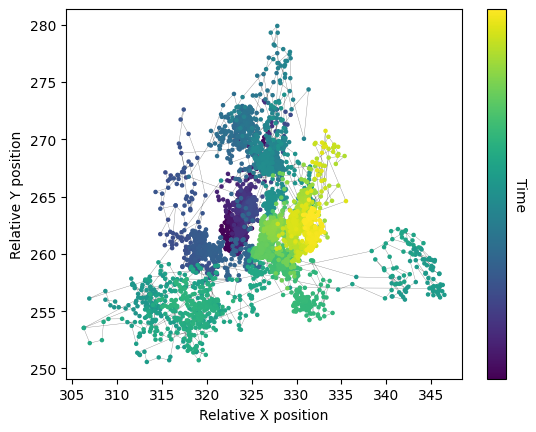

In [28]:
xs = pupil_tracking['data_x']
ys = pupil_tracking['data_y']
start, end = 20, 5000

# generate colors along viridis for the range
colors = mpl.cm.viridis(np.linspace(0, 1, end-start))

# plot the line
plt.plot(xs[start:end], ys[start:end], zorder=0, linewidth=0.25, color='gray')

# scatter with colormap
sc = plt.scatter(xs[start:end], ys[start:end], s=5, c=colors, zorder=1)

plt.xlabel("Relative X position")
plt.ylabel("Relative Y position")

# colorbar for the gradient
cbar = plt.colorbar(sc)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Time', rotation=270)
cbar.set_ticks([])

plt.show()

##Running Wheel

In [29]:
wheel_rotation = nwb.acquisition["raw_running_wheel_rotation"]
# conversion to np.array required for plotting
wheel_times = np.array(wheel_rotation.timestamps)
wheel_trace = np.array(wheel_rotation.data)

print(wheel_times.shape)
print(wheel_trace.shape)

(265441,)
(265441,)


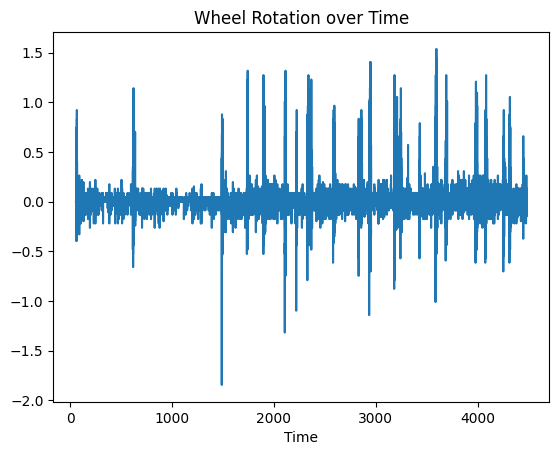

In [30]:
plt.plot(wheel_times,wheel_trace)
plt.title("Wheel Rotation over Time")
plt.xlabel("Time")
plt.show()

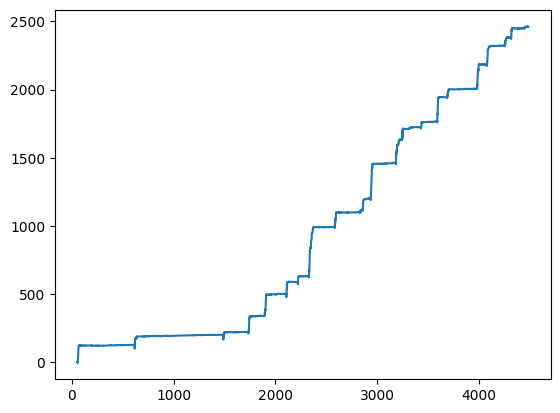

In [31]:
plt.plot(wheel_times, np.cumsum(wheel_trace))